<a href="https://www.kaggle.com/code/fyenneyenn/face-match-withface-recognition?scriptVersionId=249536357" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install -U face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 16.7 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566166 sha256=e11358168dd0614753a07c6745b53c9ae70ca760aaca9a2e7b719d38c1178daa
  Stored in directory: /root/.cache/pip/wheels/04/52/ec/9355da79c29f160b038a20c784db2803c2f9fa2c8a462c176a
Successfully built face-recognition-models


## Local Inference on GPU 
Model page:https://github.com/ageitgey/face_recognition

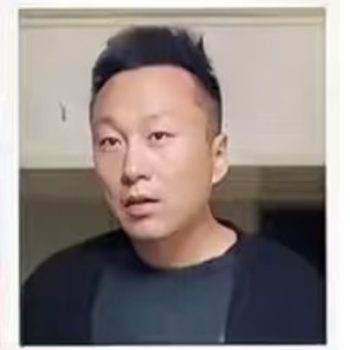

Learned encoding for 1 images.


In [3]:
from PIL import Image, ImageDraw
from IPython.display import display

# The program we will be finding faces on the example below
baseimg = '/kaggle/input/anmals-datasetx/tiger_base.jpg'
baseimg = '/kaggle/input/trumpface/base_suspect.png'
target_path = "/kaggle/input/hongjie-baseline/"
target_path = "/kaggle/input/anmals-datasetx/"
pil_im = Image.open(baseimg)
display(pil_im.resize((350, 350)) )
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display
from PIL import Image, ImageDraw, ImageFont
# Load a larger font (increase size as needed)
import os, re
q = [i for i in os.listdir(target_path)]
# This is an example of running face recognition on a single image
# and drawing a box around each person that was identified.

# Load a sample picture and learn how to recognize it.
obama_image = face_recognition.load_image_file(baseimg)
obama_face_encoding = face_recognition.face_encodings(obama_image)[0]

# # Load a second sample picture and learn how to recognize it.
# biden_image = face_recognition.load_image_file("biden.jpg")
# biden_face_encoding = face_recognition.face_encodings(biden_image)[0]

# Create arrays of known face encodings and their names
known_face_encodings = [
    obama_face_encoding,
    # biden_face_encoding
]
known_face_names = [
    "suspect",
    # "suspect2",
    
]
print('Learned encoding for', len(known_face_encodings), 'images.')

In [ ]:
def infer_(filepatgh):# Load an image with an unknown face
    unknown_image = face_recognition.load_image_file(filepatgh)
    font =ImageFont.truetype("/kaggle/input/facesreconization/DejaVuSans-Bold.ttf", size=24)
    
    # Find all the faces and face encodings in the unknown image
    face_locations = face_recognition.face_locations(unknown_image)
    face_encodings = face_recognition.face_encodings(unknown_image, face_locations)
    
    # Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
    # See http://pillow.readthedocs.io/ for more about PIL/Pillow
    pil_image = Image.fromarray(unknown_image)
    # Create a Pillow ImageDraw Draw instance to draw with
    draw = ImageDraw.Draw(pil_image)
    
    # Loop through each face found in the unknown image
    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        # See if the face is a match for the known face(s)
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
    
        name = "Unknown"
    
        # Or instead, use the known face with the smallest distance to the new face
        face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
        # print(face_distances)
        best_match_index = np.argmin(face_distances)
        if matches[best_match_index]:
            name = known_face_names[best_match_index]
        if face_distances < .33:
            # Draw a box around the face using the Pillow module
            draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))
        
            # Draw a label with a name below the face
            bbox = draw.textbbox((0, 0), name, font)  # Provide a font if you have one
            text_width = bbox[2] - bbox[0]
            text_height = bbox[3] - bbox[1]
            draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
            draw.text((left + 6, bottom - text_height - 5), name  + '\n'+str(face_distances[0]), fill=(255, 255, 255, 255))
        
    
    # Remove the drawing library from memory as per the Pillow docs
    del draw
    
    # Display the resulting image
    display(pil_image)

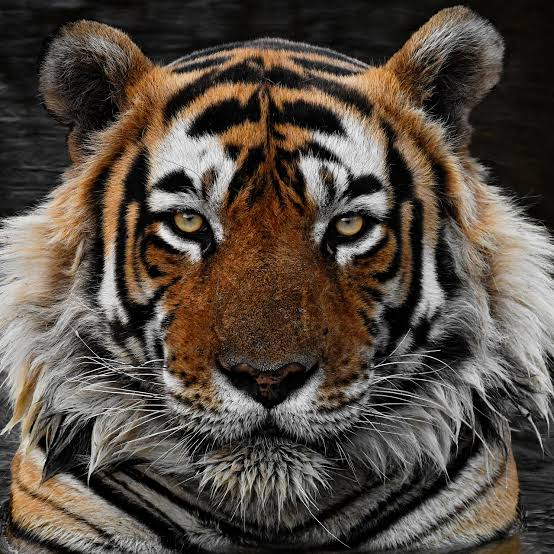

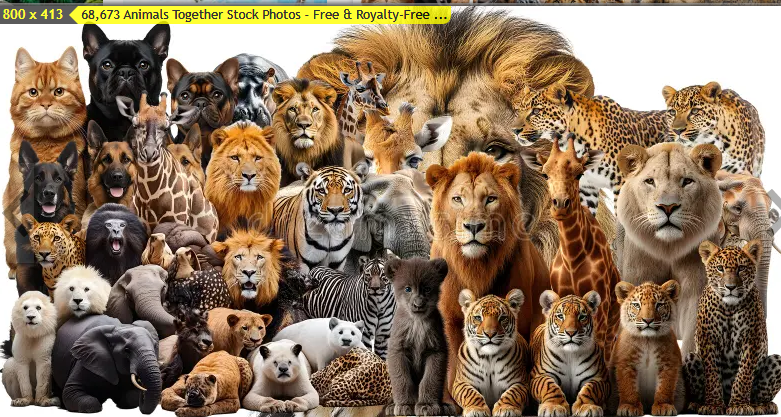

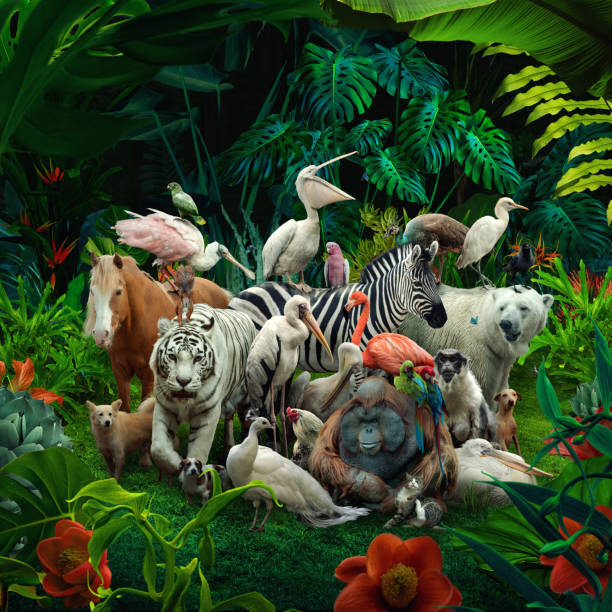

In [5]:
for i in q:
    infer_(target_path+i)

In [ ]:
# infer_("/kaggle/input/facesreconization/processed-207FAC17-BBC1-4F4E-B8DF-8877665B7D03.jpeg")